In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [2]:
def load_images(path):
    images = []
    for filename in os.listdir(path):
        img = Image.open(os.path.join(path, filename))
        img = img.resize((50, 50))
        img = img.convert("RGB")
        img = np.array(img) / 255
        images.append(img)
    return images

In [3]:
no_tumor_images = load_images("/kaggle/input/breast-histopathology-images/10253/0/")
tumor_images = load_images("/kaggle/input/breast-histopathology-images/10253/1/")

In [4]:
no_tumor_labels = np.zeros(len(no_tumor_images))
tumor_labels = np.ones(len(tumor_images))

In [5]:
len(no_tumor_images)

479

In [6]:
len(tumor_images)

70

In [7]:
X = np.array(no_tumor_images + tumor_images)
y = np.array(np.concatenate((no_tumor_labels, tumor_labels)))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(50, 50, 3), padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(50, 50, 3), padding='valid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7742 - loss: 0.5666
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8567 - loss: 0.3365
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9304 - loss: 0.2448
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9268 - loss: 0.2402
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9495 - loss: 0.1904
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9648 - loss: 0.1534
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9601 - loss: 0.1486
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9397 - loss: 0.1466
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9575 - loss: 0.1407
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9702 - loss: 0.0742


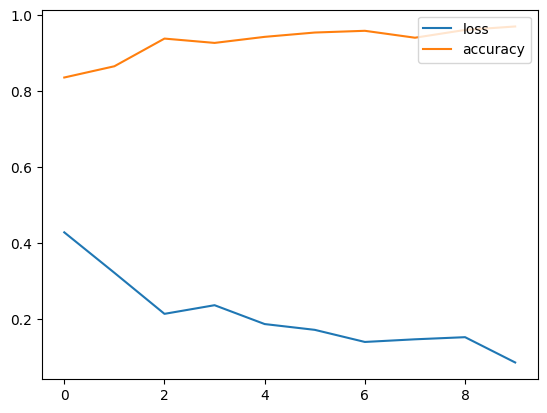

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend(loc='upper right')
plt.show()

In [12]:
test_images = Image.open("/kaggle/input/breast-histopathology-images/10254/0/10254_idx5_x1001_y1001_class0.png")
test_images = test_images.resize((50, 50))
test_images = test_images.convert('RGB')
test_images = np.array(test_images) / 255

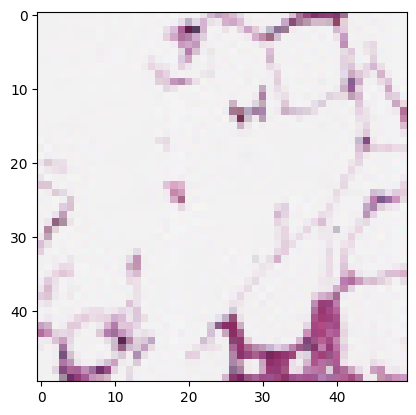

In [13]:
plt.imshow(test_images)

In [14]:
test_images = np.expand_dims(test_images, axis=0)

In [15]:
hasil = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [16]:
if hasil > 0.5:
    print("TUMOR")
else:
    print("NO TUMOR")

NO TUMOR
